## Data Preprocessing


In [19]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [20]:
dataset = pd.read_csv(r"C:\Users\user\Desktop\amsterdam\listings.csv")

In [21]:
Latitude = 52.379189
longitude = 4.899431

In [22]:
missing_values = dataset.isnull().sum()

In [23]:
print(missing_values.sort_values()[::-1])

bathrooms                       8386
calendar_updated                8386
neighbourhood_group_cleansed    8386
host_neighbourhood              5342
host_about                      3739
                                ... 
property_type                      0
longitude                          0
latitude                           0
number_of_reviews_l30d             0
id                                 0
Length: 75, dtype: int64


In [33]:
df = pd.DataFrame(dataset)
print("Original DataFrame:")
print(df)
df_cleaned = df.dropna(axis=1)
print("\nDataFrame after dropping NaN columns:")
print(df_cleaned)


Original DataFrame:
                      id                                      listing_url  \
0                 761411              https://www.airbnb.com/rooms/761411   
1                 768274              https://www.airbnb.com/rooms/768274   
2                 768737              https://www.airbnb.com/rooms/768737   
3                 771217              https://www.airbnb.com/rooms/771217   
4                 771343              https://www.airbnb.com/rooms/771343   
...                  ...                                              ...   
8381  971403658453358540  https://www.airbnb.com/rooms/971403658453358540   
8382  971600466535392582  https://www.airbnb.com/rooms/971600466535392582   
8383  971686543447319533  https://www.airbnb.com/rooms/971686543447319533   
8384  971758168481363169  https://www.airbnb.com/rooms/971758168481363169   
8385  972218247170836285  https://www.airbnb.com/rooms/972218247170836285   

           scrape_id last_scraped           source  \
0

In [34]:
dataset.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.82,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.93,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,6.62


Checking how many rows and columns the dataset has and check how many unique values are present for each column.


In [36]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())


Rows :  8386

Columns : 68

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of

So, we have the 8386 Rows, 75 Columns.


### Plotting the dataset in a map

In [37]:
Lat = 52.379189
Long = 4.899431
locations = list(zip(dataset.latitude, dataset.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

### finding missing values


In [38]:
missing_values = dataset.isnull().sum()


In [9]:
dataset = dataset.dropna()


In [39]:
import geopandas as gpd
df = pd.read_json('neighbourhoods.geojson')


In [40]:
df.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [41]:
print(f'It has the shape of listing: {dataset.shape}')

It has the shape of listing: (8386, 68)


In [42]:
dataset.isna().sum(axis=0)


id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
instant_bookable                                  0
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
reviews_per_month                               830
Length: 68, dtype: int64

In [43]:
dataset.fillna({'reviews_per_month':0},inplace=True)

### Scatter Plot to show the neighbourhood data based on Latitude and Longitude

In [44]:
import seaborn as sns

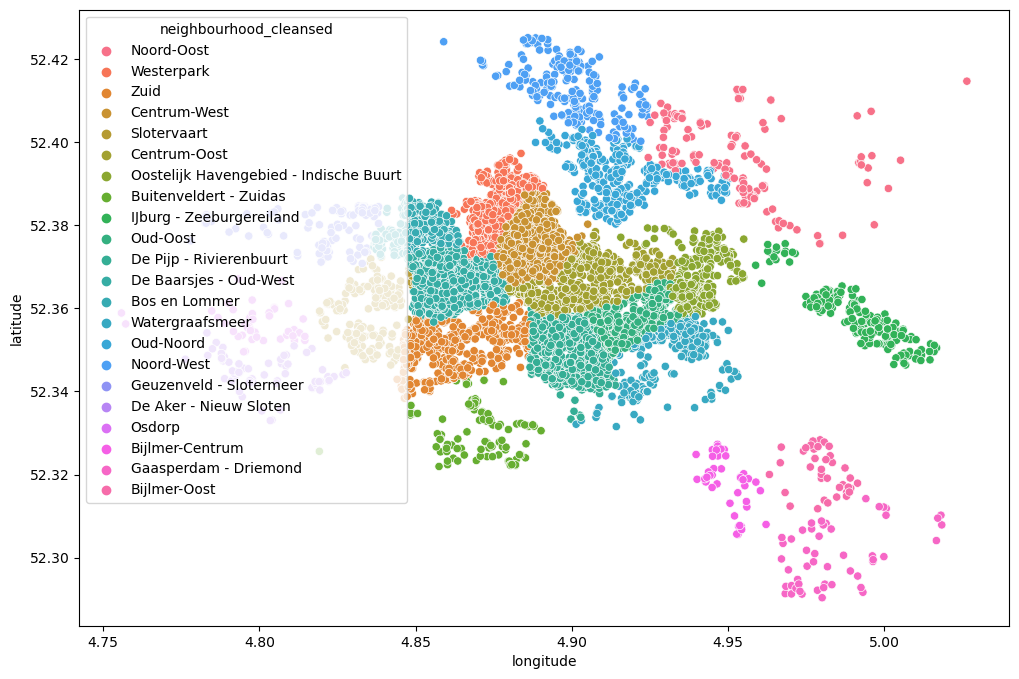

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood_cleansed)
plt.show()

In [46]:
lats2023 = dataset['latitude'].tolist()
lons2023 = dataset['longitude'].tolist()
locations = list(zip(lats2023, lons2023))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

We can see, that most listings are in the city centre.

### Unique values for room type and neighbourhood.

In [47]:
print('Unique value for room_type are :',dataset.room_type.unique())
print ('Unique value for neighbourhood_group are :',dataset.neighbourhood_cleansed.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Unique value for neighbourhood_group are : ['Noord-Oost' 'Westerpark' 'Zuid' 'Centrum-West' 'Slotervaart'
 'Centrum-Oost' 'Oostelijk Havengebied - Indische Buurt'
 'Buitenveldert - Zuidas' 'IJburg - Zeeburgereiland' 'Oud-Oost'
 'De Pijp - Rivierenbuurt' 'De Baarsjes - Oud-West' 'Bos en Lommer'
 'Watergraafsmeer' 'Oud-Noord' 'Noord-West' 'Geuzenveld - Slotermeer'
 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum'
 'Gaasperdam - Driemond' 'Bijlmer-Oost']


### The distribution of the room type 

The room type is very important in Amsterdam. Starting from early 2017, Airbnb’s systems are automatically limiting entire home listings in Amsterdam to 60 nights per calendar year. And we can see that this restriction applies to most of the listings.

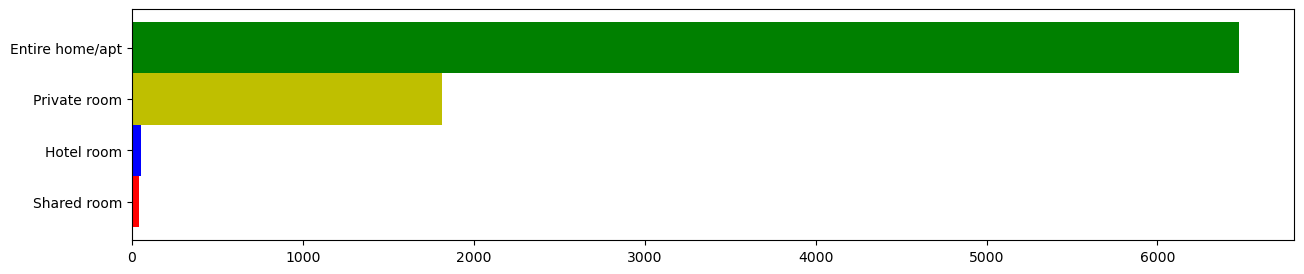

In [48]:
freq = dataset['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["r", "b", "y","g"])
plt.show()

In the dataset, we find a lot of different property types.

In [49]:
dataset.property_type.unique()

array(['Private room in condo', 'Entire rental unit',
       'Private room in boat', 'Houseboat', 'Private room in rental unit',
       'Private room in bed and breakfast', 'Private room in townhouse',
       'Private room in houseboat', 'Entire guest suite', 'Entire condo',
       'Entire loft', 'Private room in home', 'Entire guesthouse',
       'Entire townhouse', 'Entire home', 'Room in boutique hotel',
       'Private room in loft', 'Private room in guest suite', 'Boat',
       'Private room in farm stay', 'Room in bed and breakfast',
       'Private room in guesthouse', 'Private room',
       'Shared room in home', 'Entire serviced apartment',
       'Private room in villa', 'Private room in tiny home',
       'Private room in casa particular', 'Barn',
       'Private room in bungalow', 'Shared room in condo', 'Entire cabin',
       'Room in hotel', 'Entire villa', 'Entire place',
       'Private room in serviced apartment', 'Room in aparthotel',
       'Tiny home', 'Private room

Many of those property types have very few listings in Amsterdam. In the figure below, We display property types with at least 100 listings. So, the majority of the properties in Amsterdam are Entire home/ apartments.

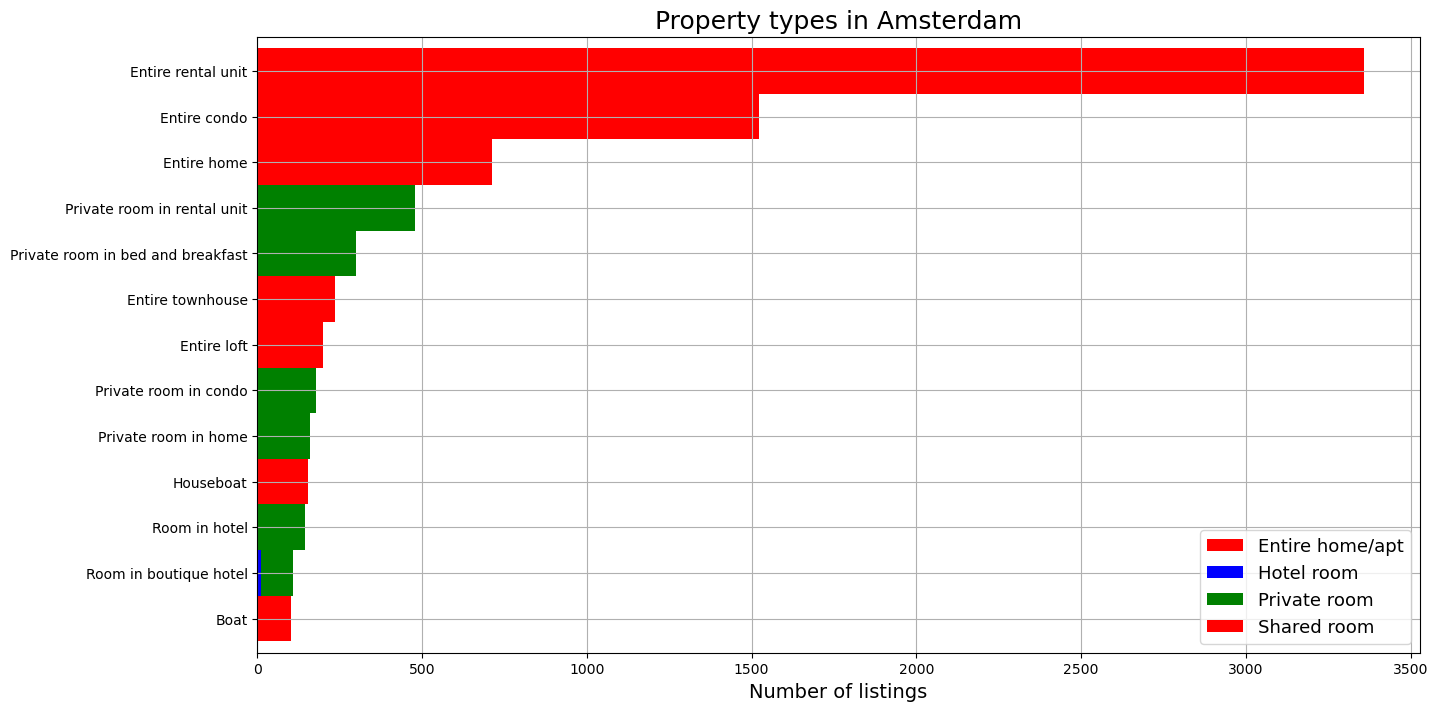

In [50]:
prop = dataset.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

### Number of people

As we can see, most listings are for 2 people and then 4 people. In addition, Airbnb uses a maximum of 16 guests per listing.

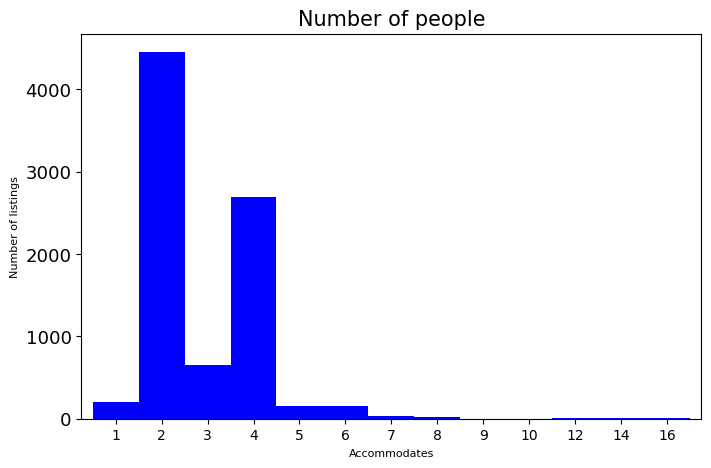

In [51]:
feq=dataset['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(8, 5), color='b', width=1, rot=0)
plt.title("Number of people", fontsize=15)
plt.ylabel('Number of listings', fontsize=8)
plt.xlabel('Accommodates', fontsize=8)
plt.show()

### Top 10 Apartment

We will do it to check for the top hoteliers if it is the same location or it is spread out.

In [53]:
apt = dataset[dataset['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name', 'neighbourhood_cleansed']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood_cleansed,apartment
5648,364305280,Arnold,De Pijp - Rivierenbuurt,14
5387,241644101,Wittenberg,Centrum-Oost,14
5664,375961673,Cityden,Bos en Lommer,9
1477,9282300,Dutch Masters,Centrum-Oost,9
6032,497874880,James,Centrum-West,8
5702,395728982,Arnoud,Geuzenveld - Slotermeer,7
4899,135487531,Rogier & Nicole,Noord-West,7
6021,495838645,Mario,Centrum-West,6
3654,46691672,Eva & Kobe,Oud-Noord,6
3065,30890942,Zoku Amsterdam,Centrum-Oost,6


### Top 10 Private room

In [54]:
private_room = dataset[dataset['room_type']=='Private room']
list_private = private_room.groupby(['host_id','host_name','neighbourhood_cleansed']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)


,host_id,host_name,neighbourhood_cleansed,private
395,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,21
1256,488984558,Abdullah,Centrum-West,14
179,4456680,Neal Estate,De Aker - Nieuw Sloten,12
854,121291199,Robin,Watergraafsmeer,11
1056,243878598,Bunk,Oud-Noord,10
1202,419001535,Dima,Zuid,10
1045,237371423,Conscious Hotel Westerpark,Westerpark,9
1106,311321908,Melrose Hotel,Centrum-West,9
1251,484535538,RoomPicks,Buitenveldert - Zuidas,9
115,3040748,Henk,Noord-Oost,8


In [52]:
private_data = dataset[dataset['host_name']=='Hotel Not Hotel']
private_data_by = private_data[['host_id','host_name','neighbourhood_cleansed','latitude','longitude']]
private_data_by.head()

,host_id,host_name,neighbourhood_cleansed,latitude,longitude
506,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36491,4.86102
508,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36714,4.86019
518,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36623,4.85891
519,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36689,4.85891
520,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,52.36568,4.85883


In [55]:
private = dataset[dataset['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood_cleansed']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood_cleansed,shared
12,245267147,ClinkNOORD,Oud-Noord,8
10,237150996,St Christophers At The Winston,Centrum-West,4
19,372015241,Ecomama,Centrum-Oost,3
13,251479377,Generator,Oud-Oost,3
18,342059962,David,Geuzenveld - Slotermeer,2
8,198405490,Suzanne,Centrum-West,2
11,243878598,Bunk,Oud-Noord,2
15,308694260,Dutchies Hostel,Bos en Lommer,2
14,251983944,Marija,Centrum-Oost,1
22,438232457,Kaan,Centrum-Oost,1


### Data distirbution for neighbourhood (location)


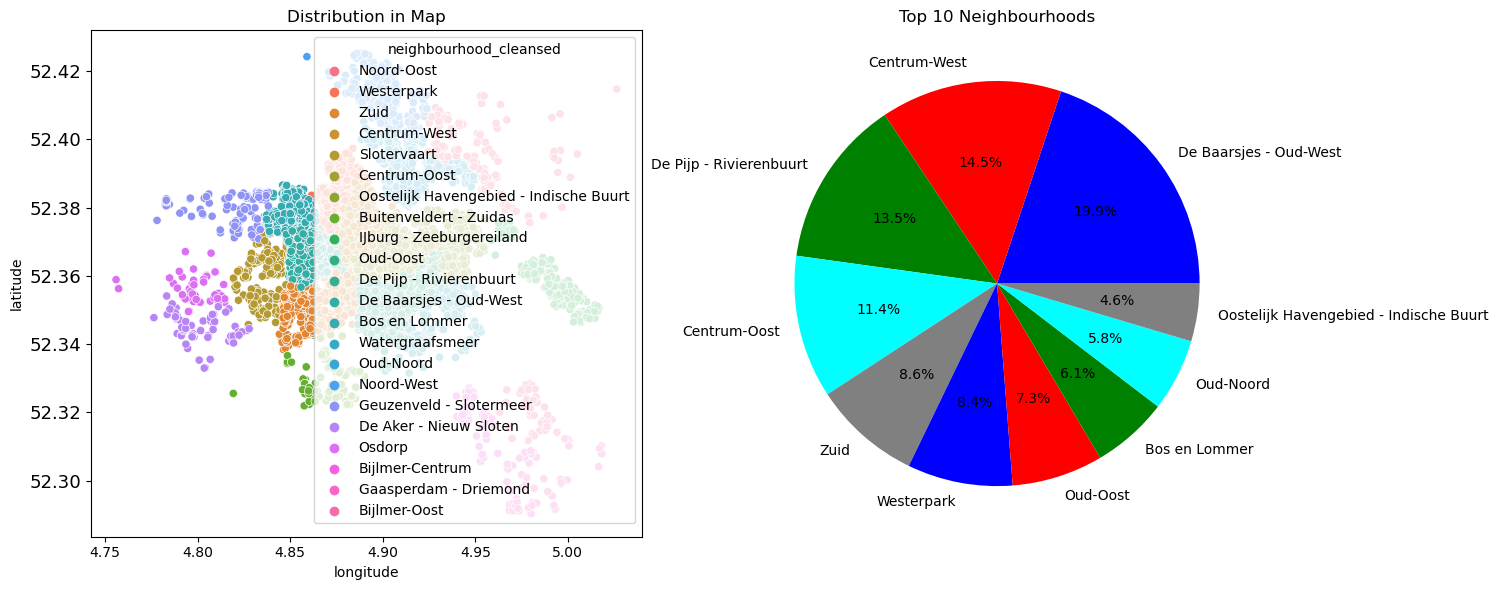

In [56]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(x=dataset['longitude'], y=dataset['latitude'], hue=dataset['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
numbers = dataset['neighbourhood_cleansed'].value_counts()[:10]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Top 10 Neighbourhoods')

plt.tight_layout()
plt.show()


In [58]:
private = dataset[dataset['neighbourhood_cleansed']=='De Baarsjes - Oud-West']
list_private = private.groupby(['host_id','host_name', 'neighbourhood_cleansed']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

,host_id,host_name,neighbourhood_cleansed,count
414,14574533,Hotel Not Hotel,De Baarsjes - Oud-West,21
1149,273266448,Vlad,De Baarsjes - Oud-West,9
1220,428344496,Catalonia Vondel Amsterdam,De Baarsjes - Oud-West,7
1125,244695471,Heye 130,De Baarsjes - Oud-West,5
1010,128826790,Natasja & Mylan,De Baarsjes - Oud-West,4
1032,143098191,Peter,De Baarsjes - Oud-West,3
1147,269726966,Adam,De Baarsjes - Oud-West,3
1093,203731852,Sweets,De Baarsjes - Oud-West,3
799,55288093,Petra,De Baarsjes - Oud-West,3
1231,439794676,Hedwig En Max,De Baarsjes - Oud-West,3


In [59]:
dataset.isna().sum(axis=0)

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
reviews_per_month                               0
Length: 68, dtype: int64

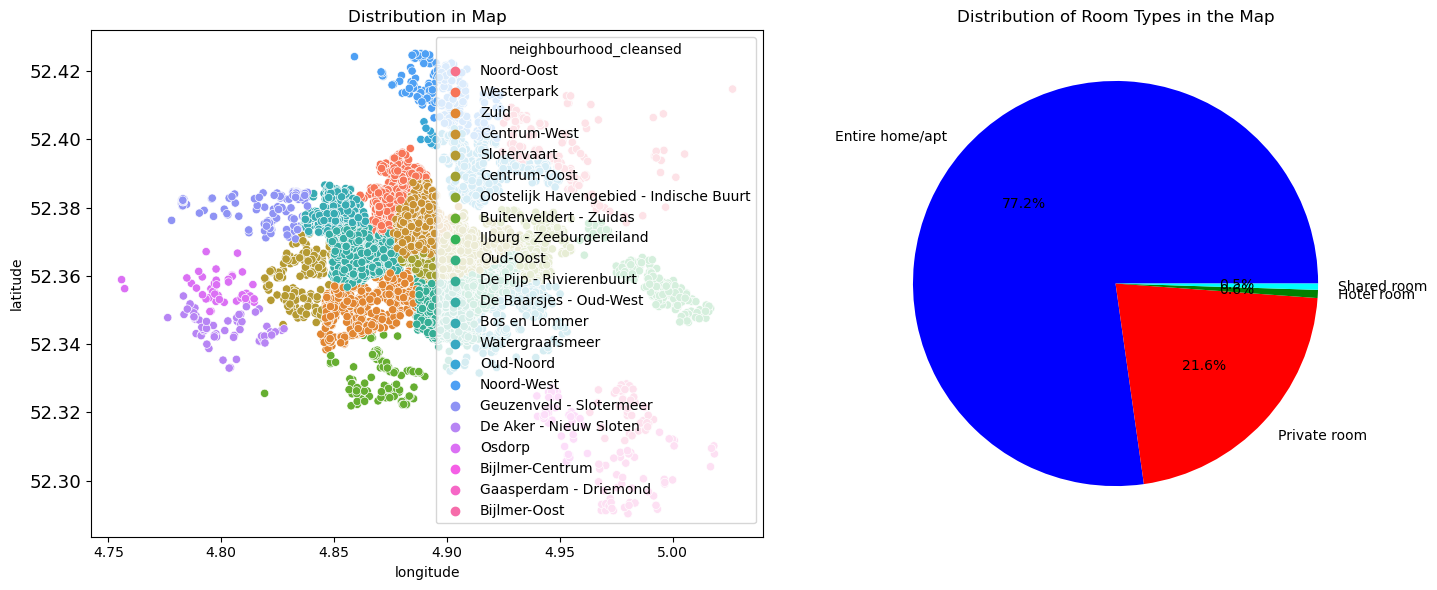

In [66]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(x=dataset['longitude'], y=dataset['latitude'], hue=dataset['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
numbers = dataset['room_type'].value_counts()[:15]
ax2.pie(numbers.values, labels=numbers.index, autopct='%1.1f%%', colors=['b', 'r', 'g', 'cyan', 'gray'])
ax2.set_title('Distribution of Room Types in the Map')

plt.tight_layout()
plt.show()



### Price analyzing 

We want to check Average daily price per neighbourhood.
In order to compare "apples to apples" we have only selected accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive.

In [62]:
dataset.price.isna().sum()

0

In [69]:
dataset['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

In [70]:
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

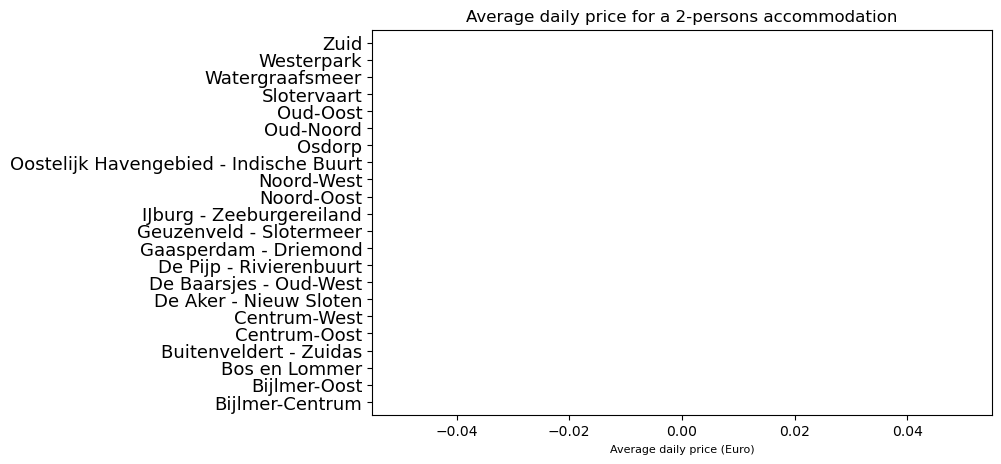

In [65]:
feq = dataset[dataset['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(8, 5), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=12)
plt.xlabel('Average daily price (Euro)', fontsize=8)
plt.ylabel("")
plt.show()

<Axes: xlabel='price'>

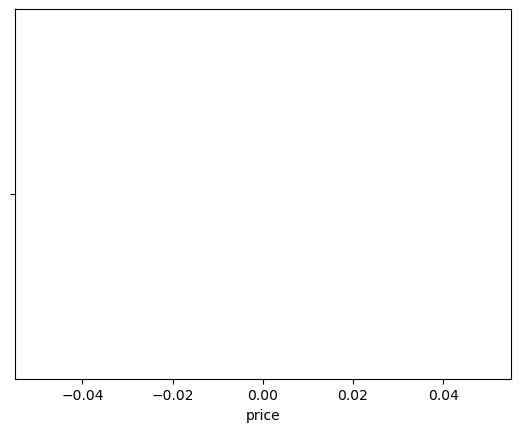

In [35]:
figsize=(12,8)
sns.boxenplot(x='price',data=dataset)

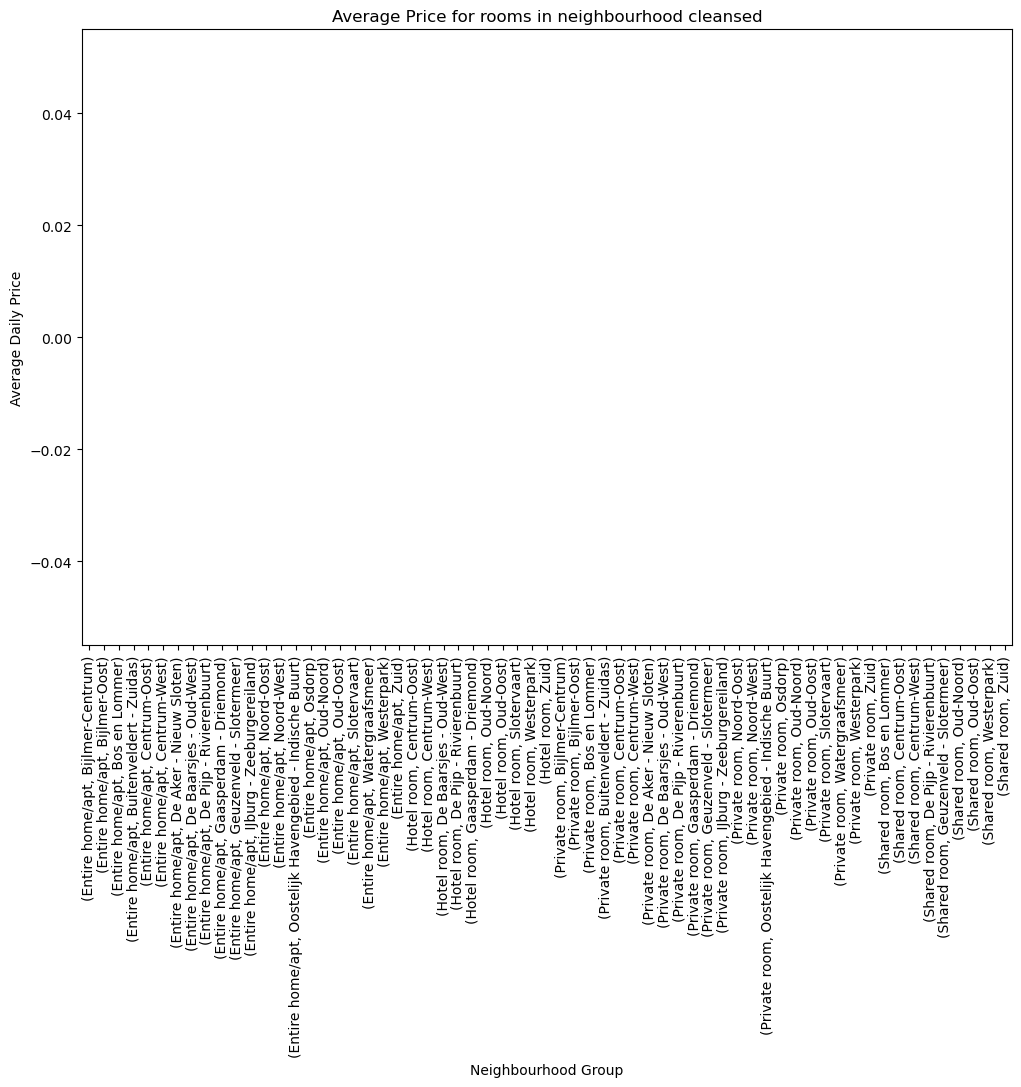

List of Average Price per night based on the neighbourhood cleansed


price
room_type       neighbourhood_cleansed        
Entire home/apt Bijlmer-Centrum            NaN
                Zuid                       NaN
                Westerpark                 NaN
                Watergraafsmeer            NaN
                Slotervaart                NaN
...                                        ...
Shared room     De Pijp - Rivierenbuurt    NaN
                Geuzenveld - Slotermeer    NaN
                Oud-Noord                  NaN
                Oud-Oost                   NaN
                Zuid                       NaN

[63 rows x 1 columns]

In [32]:
dataset.head()
plt.figure(figsize=(12,8))
df = dataset[dataset['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood cleansed')
pd.DataFrame(df1).sort_values(by='room_type')

In [ ]:
dataset.head()

plt.figure(figsize=(5,3))
df = dataset[dataset['minimum_nights'] == 1]
df1 = df.groupby(['room_type', 'neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).nlargest(10)
df1.plot(kind='bar')
plt.title('Top 10 Average Prices for Rooms in Neighbourhood Cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Cleansed')
plt.show()

print('List of Top 10 Average Prices per Night Based on the Neighbourhood Cleansed')
pd.DataFrame(df1).sort_values(by='room_type')


In [ ]:
print('Top 10 most expensive locality in Airbnb_Amsterdam listing are :')
df4 = dataset.dropna(subset=["price"]).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", "price"]].agg("mean", numeric_only=True).sort_values(by="price", ascending=False)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

In [ ]:
print('\nTop 15 cheapest localities in Airbnb_Amsterdam listings are:')
top_10_cheapest = dataset.groupby("neighbourhood_cleansed")["price"].mean().nsmallest(15)
print(top_10_cheapest)

top_10_cheapest.plot(kind='bar', figsize=(5, 3))
plt.title('Top 15 Cheapest Localities in Airbnb_Amsterdam Listings')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Cleansed')
plt.show()

In [ ]:
df5 = dataset.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

In [ ]:
print('Least Listing number of count')
df5 = dataset.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

In [ ]:
fig = plt.figure(figsize=(12,4))
review_50 = dataset[dataset['number_of_reviews']>=50]
df2 = review_50['neighbourhood_cleansed'].value_counts()
df2.plot(kind='bar',color=['b'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood')
plt.show()
print(' Count of Review v/s neighbourhood')
pd.DataFrame(df2)

In [ ]:
map1=folium.Map([52.379189,4.899431],zoom_start=9.8)
location = ['latitude','longitude']
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'yellow'}).add_to(map1)
map1

In [ ]:
plt.figure(figsize=(5,3))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=dataset['price'],x=dataset['availability_365'])

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=dataset['price'],x=dataset['availability_60'])

In [ ]:
df6 = review_50.groupby(['neighbourhood_cleansed','room_type']).mean(numeric_only=True)
df6 = df6.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(df6).sort_values('neighbourhood_cleansed')

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x=dataset['neighbourhood_cleansed'], hue=dataset['room_type'])
plt.title('Distribution of the room types in each location')
plt.show()

### Price distribution


In [ ]:
import geopandas as gpd
target_crs = 'EPSG:7080'

geo_ams = geo_ams.to_crs(target_crs)

geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y

In [ ]:
top_neighborhoods = dataset.groupby('neighbourhood_cleansed')['price'].mean().nlargest(5).index
top_neighborhood_data = dataset[dataset['neighbourhood_cleansed'].isin(top_neighborhoods)]

plt.figure(figsize=(7,5))
sns.boxplot(data=top_neighborhood_data, x='neighbourhood_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for top 5 neighbourhood groups', fontsize=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.show()


It can be seen that mean of prices in Zuid are higher than the rest. Then, we will find out which room is the most expensive and which room type is the cheapest.

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(dataset=dataset, x='room_type', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel('Price')


In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(dataset['accommodates'], kde=True, color='blue')
plt.title('Distribution of Accommodates', fontsize=15)
plt.xlabel('Accommodates')
plt.show()


Mostly houses are 2 accommodates


### Distribution of the Price


In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(dataset['price'], kde=False, color='blue')
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Price')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(dataset['price'], kde=False, color='blue')
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Price')
plt.xlim(0, 2000)
plt.show()



It can be seen that prices are mostly around between 100 and 300 dollars. Price data is right skewed. Let's plot the Price Distribution in Logarithm to see what happens

In [ ]:
plt.figure(figsize=(6, 6))
sns.displot(dataset['log_price'], kde=False, color='blue')
plt.title('Distribution of Log Prices', fontsize=15)
plt.xlabel('Log Price')
plt.show()


When we plot the price in logarithmic case, the distribution likes the normal distribution. The skewed data turned to like a normal distribution.

Most Expensive and The Cheapest Neighbourhoods

In [ ]:
a = dataset.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(20)
d = dataset.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(20)

In [ ]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 10 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 10 neighbourhood')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1, palette='viridis')
ax1.set_title('The cheapest 10 neighbourhood')
ax1.set_xlabel('Price')
ax1.set_ylabel('Neighborhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2, palette='viridis')
ax2.set_title('The most expensive 10 neighbourhood')
ax2.set_xlabel('Price')
ax2.set_ylabel('Neighborhood')

plt.tight_layout()  
plt.show()


Distribution of the Reviews

In [ ]:
reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
for ax, name in zip(axes.flatten(), reviews):
    ax.hist(dataset[name], bins=20)
    ax.set_title(f"Distribution of {name}")

plt.tight_layout()
plt.show()


Reviews Scores are mostly around 4 - 5. Since the most of the houses review scores are high, it might not be a good feature for price prediction. But that is just an assumption. We will see if there is a correlation between review scores and the price after a few cells.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = dataset.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

In [ ]:
corr = dataset.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ML 

In [72]:
dataset = dataset[dataset.price > 0]
dataset.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availabil

In [73]:
dataset.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
instant_bookable                                 object
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
reviews_per_month                               float64
Length: 68, dtype: object

In [74]:
dataset = dataset.reset_index(drop=True)

dataset.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month


In [76]:
dataset.drop(columns=['log_price'], inplace=True)

KeyError: "['log_price'] not found in axis"

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")


X.head()

AttributeError: 'dict' object has no attribute 'drop'